# <div>
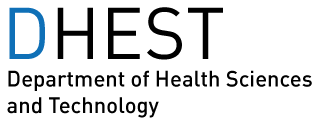
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQe1ZHapHvYNyrCLtdygLfLu92gN3ztZ64m9U8eNLeYE5BKY7r9wJiBgH7cnhZ7B269qw&usqp=CAU" width="300" align="left" style="display: inline;"/>
    <div ><h1 style="display: inline;"><br/>FoDS Group Project G5G </h1></div>

 </div>

 

The data used in this group project belongs to THE BIG CITIES HEALTH INVENTORY DATA PLATFORM which provides public health data from 35 large US-American cities. The dataset includes categories like infectious diseases (e.g. HIV/AIDS), chronic conditions (e.g. diabetes, cardiovascular), mental health. In addition, information on violence and crime, socio-economic factors and the built environment are available.

The goal of this group project is to create 4 Machine Learning Models that predict diabetes prevalence using the information on built-environment.
The following 4 ML models will be applied and the data will be split using leave-one-out crossvalidation:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regression

In a further step their performances will be evaluated, compared and visualized.

In [7]:
# Import packages that are needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# For Scaling
from sklearn.preprocessing import StandardScaler

# For linear regression
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# For ridge regression
from sklearn.linear_model import Ridge

# For lasso regression
from sklearn.linear_model import Lasso

# For random forest regression
from sklearn.ensemble import RandomForestRegressor

# For hyperparameter-tuning
from sklearn.model_selection import GridSearchCV

# For Evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error

# For visualisation and texting
import textwrap

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
 # Create a custom colorblind friendly colors palette

color_palette = [
    (0, 109, 219),     # darkblue
    (219, 109, 0),     # orange
    (0, 146, 146),     # lightgreen
    (182, 109, 255),   # violet
    (146, 73, 0),      # brown
    (73, 0, 146),      # purple
    (0, 73, 73),       # darkgreen
    (146, 0, 0),       # red
    (255, 182, 219),   # lightpink
    (255, 109, 182),   # pink
    (109, 182, 255),   # blue
    (255, 255, 109),   # yellow
    (36, 255, 36),     # green
    (0, 0, 0)          # black
]

# Convert RGB values to normalized [0, 1] range
color_palette = [(r/255, g/255, b/255) for r, g, b in color_palette]

# Set the color palette for seaborn and matplotlib
sns.set_palette(color_palette)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_palette)

## 1- Getting familiar with the data: Data Exploration

In [11]:
data = pd.read_csv('../data/BigCitiesHealth.csv')
display(data)

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
0,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Dallas,TX,"Dallas, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Male,Hispanic Male
1,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Fort Worth,TX,"Fort Worth, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Male,Asian/PI Male
2,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Antonio,TX,"San Antonio, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male,White Male
3,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Chicago,IL,"Chicago, IL",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Male,Hispanic Male
4,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Kansas City,MO,"Kansas City, MO",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Male,Hispanic Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148287,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,New York City,NY,"New York City, NY",...,NaN,NaN,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148288,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Both,NaN
148289,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Houston,TX,"Houston, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Asian/PI,Both,NaN
148290,Premature Death,Life Expectancy and Deaths,Deaths,Years of potential life lost before age 75 (pe...,"Years per 100,000 population aged <75","National Vital Statistics System (NVSS), Cente...",https://

In [12]:
data.iloc[:,[9,10,11,12,13,14,15,16,17,18,19,20,21,22]]

,geo_label_citystate,geo_fips_code,value,date_label,geo_label_proxy_or_real,geo_label_proxy_footnote,geo_fips_desc,date_label_proxy_or_real,date_label_proxy_footnote,value_ci_flag_yesno,value_95_ci_low,value_95_ci_high,value_90_ci_low,value_90_ci_high
0,"Dallas, TX",4819000.0,271.876868,2020,real,NaN,place,real,NaN,yes,240.233095,307.293299,NaN,NaN
1,"Fort Worth, TX",4827000.0,333.954685,2020,real,NaN,place,real,NaN,yes,161.906352,629.881493,NaN,NaN
2,"San Antonio, TX",4865000.0,85.391551,2020,real,NaN,place,real,NaN,yes,73.839052,98.550579,NaN,NaN
3,"Chicago, IL",1714000.0,354.585206,2020,real,NaN,place,real,NaN,yes,328.986597,382.175123,NaN,NaN
4,"Kansas City, MO",2938000.0,187.017704,2020,real,NaN,place,real,NaN,yes,104.928717,316.971329,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148287,"New York City, NY",3651000.0,5786.217877,2020,real,NaN,place,real,NaN,yes,5668.487295,5903.948459,NaN,NaN
148288,"Milwaukee, WI",5553000.0,7087.929743,2020,real,NaN,place,real,NaN,yes,6458.346917,7717.512570,NaN,NaN
148289,"Houston, TX",4835000.0,4099.348306,2011,real,NaN,place,real,NaN,yes,3723.288703,4475.407910,NaN,NaN
148290,"Milwaukee, WI",5553000.0,5706.528569,2014,real,NaN,place,real,NaN,yes,4594.357077,6818.700061,NaN,NaN


In [13]:
data.iloc[:,1].unique()

array(['Infectious Diseases', 'Chronic Health Conditions',
       'Physical and Built Environment', 'Life Expectancy and Deaths',
       'Access to Health Services', 'Maternal and Child Health',
       'Mental Health and Substance Use', 'Poisoning',
       'Violence and Injury', 'Social and Economic Factors',
       'Demographics'], dtype=object)

In [14]:
data.iloc[:,2].unique()

array(['Respiratory Infection', 'Diabetes and Obesity',
       'Active Transportation', 'Deaths', 'Life Expectancy at Birth',
       'Health Insurance', 'Oral Health', 'Births', 'Disability',
       'Respiratory Disease', 'Cancer', 'Cardiovascular Disease',
       'Physical Activity', 'Dietary Quality',
       'Sexually Transmitted Disease', 'Birth Control', 'Substance Use',
       'Mental Health', 'Lead Poisoning', 'Crime Incidents',
       'School Violence', 'Housing', 'Education', 'Income',
       'Income-related', 'Income Inequality',
       'Racial Segregation Indices', 'Food Access', 'Transportation',
       'Air Quality', 'Population', 'Race/Ethnicity',
       'Language and Nativity'], dtype=object)

In [15]:
data.iloc[:,3].unique()

array(['Deaths from COVID-19 (per 100,000 population, age-adjusted)',
       'Deaths from diabetes (per 100,000 population, age-adjusted)',
       'Percent of workers aged 16+ who walk to work',
       'Deaths from all causes (per 100,000 population, age-adjusted)',
       'Life expectancy at birth (years, age-adjusted, 5-year estimate)',
       'Percent of the population without health insurance',
       'Percent of children aged <19 without health insurance',
       'Percent of adults aged 18+ visited dentist or dental clinic in the past year',
       'Percent of births for which prenatal care began in the first trimester',
       'Percent of the population with a long-term disability of any kind',
       'Percent of high school students ever diagnosed with asthma',
       'Deaths from all types of cancer (per 100,000 population, age-adjusted)',
       'Deaths from breast cancer in females (per 100,000 population, age-adjusted)',
       'Deaths from lung cancer (per 100,000 populatio

In [16]:
print(data['geo_label_citystate'].unique())
print(data['geo_label_citystate'].unique().shape)

['Dallas, TX' 'Fort Worth, TX' 'San Antonio, TX' 'Chicago, IL'
 'Kansas City, MO' 'Seattle, WA' 'Portland, OR' 'San Jose, CA'
 'Washington, DC' 'Las Vegas, NV' 'New York City, NY' 'Boston, MA'
 'Cleveland, OH' 'San Francisco, CA' 'Philadelphia, PA' 'Oakland, CA'
 'Los Angeles, CA' 'Milwaukee, WI' 'Phoenix, AZ' 'Oklahoma City, OK'
 'Charlotte, NC' 'Baltimore, MD' 'Columbus, OH' 'Denver, CO'
 'Long Beach, CA' 'Louisville, KY' 'Minneapolis, MN' 'Indianapolis, IN'
 'Memphis, TN' 'San Diego, CA' 'El Paso, TX' 'Austin, TX' 'Houston, TX'
 'Detroit, MI' 'Tucson, AZ' 'U.S. Total']
(36,)


In [17]:
data['date_label'].unique()

array([2020, 2011, 2010, 2017, 2019, 2018, 2014, 2016, 2013, 2012, 2015])

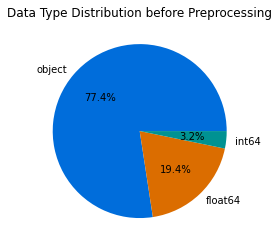

In [20]:
# Data-Types analysis before preprocessing
data_types = data.dtypes

# Count the occurrences of each data type
data_type_counts = data_types.value_counts()

# Create a pie chart
plt.pie(data_type_counts.values, labels=data_type_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Data Type Distribution before Preprocessing')

# Save and Show the plot
plt.savefig("../output/dtypes_before.png", bbox_inches='tight', dpi=300)
plt.show()


## 2- Preprocessing the Data
### 2.1- Getting the relevant Data

In [22]:
# Preprocess our the Data that is relevant for prevalence of diabetes (outcome) and the built-environment (features)
features = data

features = data[
    (data['metric_cat_label'] == 'Physical and Built Environment') &
    (data['date_label'] == 2018) &
    (data['geo_label_citystate'] != 'U.S. Total') &
    (data['strata_sex_label'] == 'Both') &
    (data['strata_race_label'] == 'All')
]


outcome = data[
    (data['metric_item_label'] == 'Diabetes') &
    (data['date_label'] == 2018) &
    (data['geo_label_citystate'] != 'U.S. Total') &
    (data['strata_sex_label'] == 'Both') &
    (data['strata_race_label'] == 'All')
]

In [23]:
features

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
131386,Limited Supermarket Access,Physical and Built Environment,Food Access,Percent of residents that are low income and d...,Percent,"Economic Research Service, U.S. Department of ...",https://www.ers.usda.gov/data-products/food-ac...,Milwaukee,WI,"Milwaukee, WI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both,NaN
131392,Limited Supermarket Access,Physical and Built Environment,Food Access,Percent of residents that are low income and d...,Percent,"Economic Research Service, U.S. Department of ...",https://www.ers.usda.gov/data-products/food-ac...,Louisville,KY,"Louisville, KY",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
131393,Limited Supermarket Access,Physical and Built Environment,Food Access,Percent of residents that are low income and d...,Percent,"Economic Research Service, U.S. Department of ...",https://www.ers.usda.gov/data-products/food-ac...,Memphis,TN,"Memphis, TN",...,NaN,NaN,South,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both,NaN
131412,Limited Supermarket Access,Physical and Built Environment,Food Access,Percent of residents that are low income and d...,Percent,"Economic Research Service, U.S. Department of ...",https://www.ers.usda.gov/data-products/food-ac...,Minneapolis,MN,"Minneapolis, MN",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
131420,Limited Supermarket Access,Physical and Built Environment,Food Access,Percent of residents that are low income and d...,Percent,"Economic Research Service, U.S. Department of ...",https://www.ers.usda.gov/data-products/food-ac...,New York City,NY,"New York City, NY",...,NaN,NaN,Northeast,Less poor cities (<20% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),All,Both,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137834,Hazardous Air Quality,Physical and Built Environment,Air Quality,Percent of days where the air quality was unhe...,Percent,U.S. Environmental Protection Agency,https://www.epa.gov/outdoor-air-quality-data,San Diego,CA,"San Diego, CA",...,NaN,NaN,West,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
137835,Hazardous Air Quality,Physical and Built Environment,Air Quality,Percent of days where the air quality was unhe...,Percent,U.S. Environmental Protection Agency,https://www.epa.gov/outdoor-air-quality-data,Los Angeles,CA,"Los Angeles, CA",...,NaN,NaN,West,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both,NaN
137836,Hazardous Air Quality,Physical and Built Environment,Air Quality,Percent of days where the air quality was unhe...,Percent,U.S. Environmental Protection Agency,https://www.epa.gov/outdoor-air-quality-data,Oakland,CA,"Oakland, CA",...,NaN,NaN,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
137837,Hazardous Air Quality,Physical and Built Environment,Air Quality,Percent of days where the air quality was unhe...,Percent,U.S. Environmental Protection Agency,https://www.epa.gov/outdoor-air-quality-data,Tucson,AZ,"Tucson, AZ",...,NaN,NaN,West,Poorest cities (20%+ poor),Sma

In [24]:
outcome

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
43309,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Philadelphia,PA,"Philadelphia, PA",...,NaN,NaN,Northeast,Poorest cities (20%+ poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),All,Both,NaN
43311,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Fort Worth,TX,"Fort Worth, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
43315,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Columbus,OH,"Columbus, OH",...,NaN,NaN,Midwest,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
43316,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Cleveland,OH,"Cleveland, OH",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both,NaN
43319,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Oklahoma City,OK,"Oklahoma City, OK",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
43321,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Baltimore,MD,"Baltimore, MD",...,NaN,NaN,South,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both,NaN
43336,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Las Vegas,NV,"Las Vegas, NV",...,NaN,NaN,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
43349,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Oakland,CA,"Oakland, CA",...,NaN,NaN,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
43363,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,San Francisco,CA,"San Francisco, CA",...,NaN,NaN,West,Less poor cities (<20% poor),Smaller (<1.3 million),Highest pop. density (>10k per sq mi),Less Segregated (<50%),All,Both,NaN
43420,Diabetes,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 20+ with diabetes,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Los Angeles,CA,"Los Ange

In [25]:
# Handle Missing Data:
print(features.isna().sum())
print(outcome.isna().sum())
# no missing values in columns of interest

# Search for possible duplicated rows:
print(features.duplicated().sum())
print(outcome.duplicated().sum())
# There are no duplicats

metric_item_label                    0
metric_cat_label                     0
metric_subcat_label                  0
metric_item_label_subtitle           0
metric_cat_item_yaxis_label          0
metric_source_desc_label_fn          0
metric_source_desc_label_url_fn      0
geo_label_city                       0
geo_label_state                      0
geo_label_citystate                  0
geo_fips_code                        0
value                                0
date_label                           0
geo_label_proxy_or_real              0
geo_label_proxy_footnote           315
geo_fips_desc                        0
date_label_proxy_or_real             0
date_label_proxy_footnote           70
value_ci_flag_yesno                  0
value_95_ci_low                    315
value_95_ci_high                   315
value_90_ci_low                    315
value_90_ci_high                   315
geo_strata_region                    0
geo_strata_poverty                   0
geo_strata_Population    

In [26]:
# Print the features and the number of features
print(features['metric_item_label'].unique())
print(features['metric_item_label'].unique().shape)

['Limited Supermarket Access' 'Walking to Work' 'Riding Bike to Work'
 'Lack of Car' 'Public Transportation Use' 'Drives Alone to Work'
 'Longer Driving Commute Time' 'Poor Air Quality' 'Hazardous Air Quality']
(9,)


In [27]:
# Print the outcome and the number of outcomes (only 1 expected, but good to check)
print(outcome['metric_item_label'].unique())
print(outcome['metric_item_label'].unique().shape)

['Diabetes']
(1,)


In [28]:
features = features.pivot(index = 'geo_label_citystate', columns = 'metric_item_label', values = 'value')
features

metric_item_label,Drives Alone to Work,Hazardous Air Quality,Lack of Car,Limited Supermarket Access,Longer Driving Commute Time,Poor Air Quality,Public Transportation Use,Riding Bike to Work,Walking to Work
geo_label_citystate,,,,,,,,,
"Austin, TX",73.742798,2.465753,6.187564,53.410736,33.133064,34.520548,3.489359,1.285146,2.409166
"Baltimore, MD",60.164552,2.197802,28.900199,45.267286,43.143126,32.417582,17.486046,0.938746,6.437840
"Boston, MA",38.274913,0.273973,34.221696,16.368908,50.765315,34.794521,33.286003,2.267323,15.112459
"Charlotte, NC",76.298476,1.388889,6.409073,56.727806,35.464175,32.777778,3.301090,0.142028,2.067071
"Chicago, IL",48.843116,5.205479,26.908905,24.637962,60.244648,58.356164,28.221544,1.707568,6.530898
"Cleveland, OH",69.306185,3.013699,23.012155,46.745246,25.692221,39.452055,9.772588,0.613079,5.069960
"Columbus, OH",79.381475,0.547945,8.874129,60.118738,24.685168,28.493151,3.085627,0.597486,3.076661
"Dallas, TX",76.710433,5.205479,9.288470,50.986243,41.281494,34.246575,3.760092,0.192140,2.090902
"Denver, CO",69.124119,2.739726,9.843417,48.139841,38.832899,51.506849,6.539476,2.227180,4.682016


In [29]:
outcome = outcome.pivot(index = 'geo_label_citystate', columns = 'metric_item_label', values = 'value')
outcome

metric_item_label,Diabetes
geo_label_citystate,
"Austin, TX",7.5
"Baltimore, MD",13.7
"Boston, MA",8.0
"Charlotte, NC",9.2
"Chicago, IL",10.9
"Cleveland, OH",17.3
"Columbus, OH",11.0
"Dallas, TX",11.3
"Denver, CO",7.0


### 2.2- Visualizing the preprocessed data

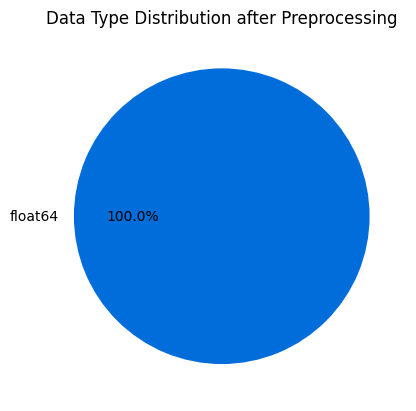

In [190]:
# Data-Types analysis after preprocessing
features_dtypes = features.dtypes

# Count the occurrences of each data type
features_dtype_counts = features_dtypes.value_counts()

# Create a pie chart
plt.pie(features_dtype_counts.values, labels=features_dtype_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Data Type Distribution after Preprocessing')

# Show the plot
plt.savefig("../output/dtypes_after.png", bbox_inches='tight', dpi=300)
plt.show()


In [20]:
#Display numeric descriptive statistics
display(features.describe())

metric_item_label,Drives Alone to Work,Hazardous Air Quality,Lack of Car,Limited Supermarket Access,Longer Driving Commute Time,Poor Air Quality,Public Transportation Use,Riding Bike to Work,Walking to Work
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,66.771140,5.292301,15.748137,43.466885,37.951012,43.830820,11.343618,1.381420,4.570413
std,16.487489,7.027350,11.213118,17.990144,10.952845,19.754917,13.049887,1.473866,3.753978
min,22.253013,0.000000,5.226474,2.690364,23.150172,15.342466,0.545899,0.142017,1.219003
25%,58.743761,2.191781,8.355883,31.508050,26.992820,32.373175,3.085939,0.295839,1.943490
50%,74.472607,3.013699,10.573501,45.267286,37.044133,37.534247,4.466689,0.788065,3.082830
75%,78.339618,4.931507,20.399477,58.423272,46.071408,51.780822,15.318357,2.175273,6.117452
max,82.600649,29.589041,54.647471,73.280664,60.244648,90.410959,56.007967,5.989261,15.112459


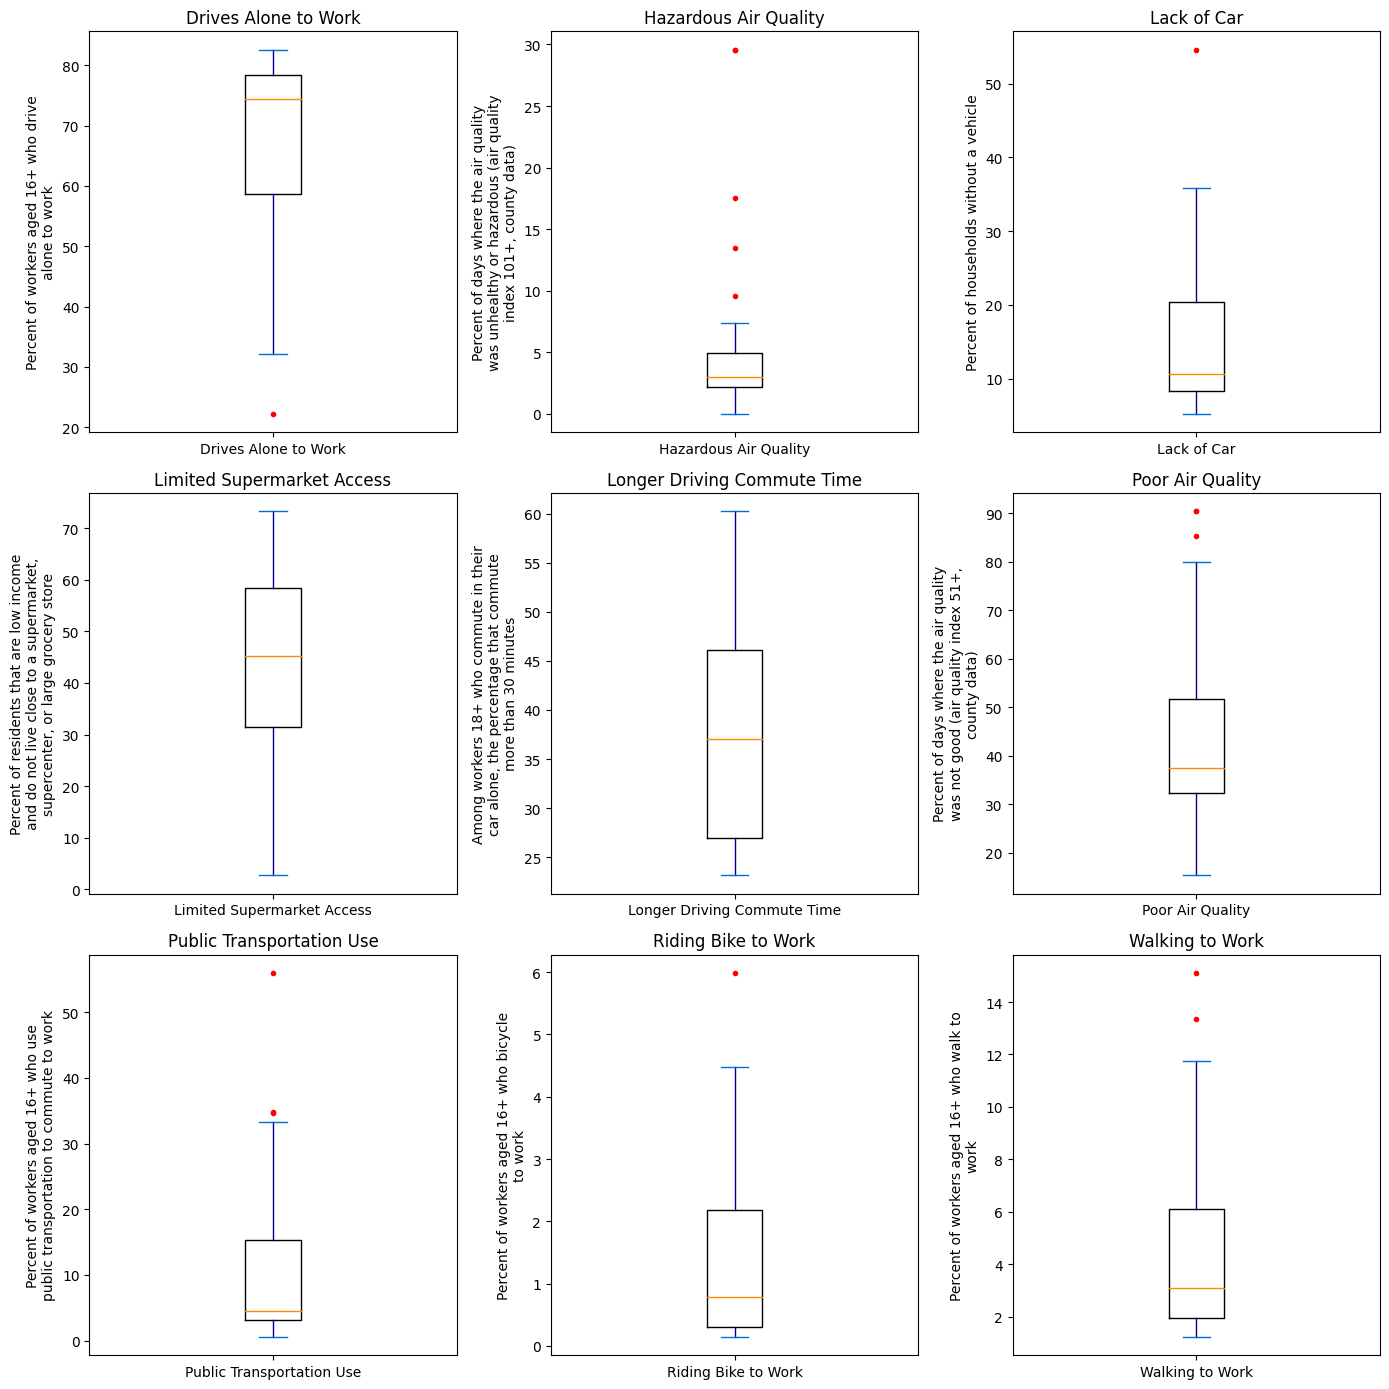

In [191]:
# Auxiliary function to visualize distribution of the features
def features_boxplot(data: pd.DataFrame, parameters: dict, axes):
    # Customize the colors of the boxes and whiskers
    color = {"boxes": "Black", "whiskers": "DarkBlue", "medians": "DarkOrange"}

    # Iterate over all the parameters in the dictionary
    for i, (param, lbl) in enumerate(parameters.items()):
        # Select the axes to plot the parameter
        ax = axes[i]

        # Using the default built-in pandas function, create a box plot in the selected axes
        data[[param]].plot.box(ax=ax, color=color, sym="r.").set(title=f'{param} box plot', ylabel=lbl)


# Create a 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(14, 14))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each feature and plot its distribution
for i, feature in enumerate(features.columns):
    ax = axes[i]  # Get the current axis

    # Get the corresponding metric_item_label_subtitle for the feature
    metric_label = data.loc[data["metric_item_label"] == feature, "metric_item_label_subtitle"].iloc[0]

    # Truncate and wrap the metric_label if it's too long
    max_label_length = 40  # Maximum number of characters for the x-label
    if len(metric_label) > max_label_length:
        metric_label = "\n".join(textwrap.wrap(metric_label, max_label_length))  # Wrap the label

    # Plot the box plot of the feature using the parameters_boxplot auxiliary function
    features_boxplot(features, {feature: metric_label}, axes=[ax])

    # Set the title of the subplot
    ax.set_title(feature)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.savefig("../output/distr_features.png", bbox_inches='tight', dpi=300)
plt.show()

In [192]:
#Display numeric descriptive statistics
display(outcome.describe())

metric_item_label,Diabetes
count,35.000000
mean,11.051429
std,2.778105
min,7.000000
25%,8.950000
50%,11.000000
75%,11.850000
max,18.500000


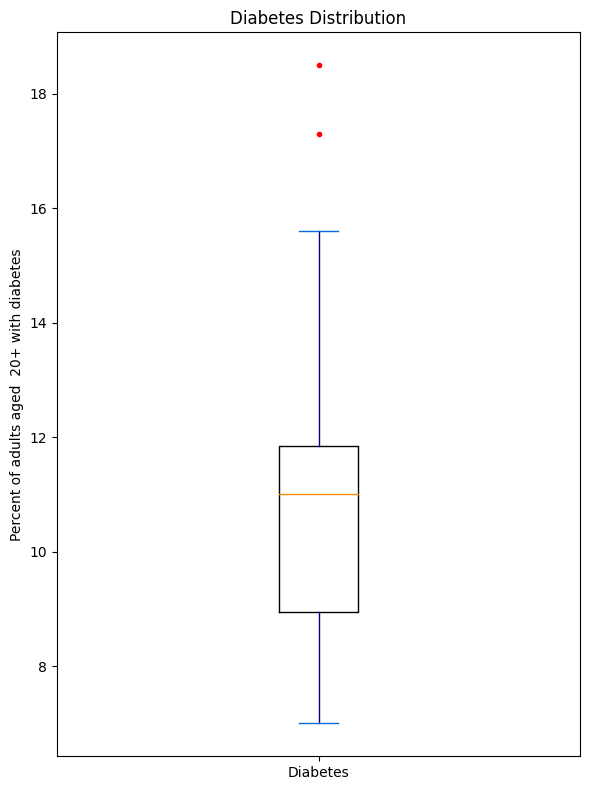

In [194]:
def outcome_boxplot(data, parameter, label):
    color = {"boxes": "Black", "whiskers": "DarkBlue", "medians": "DarkOrange"}
    fig, ax = plt.subplots(figsize=(6, 8))
    data.plot.box(column=parameter, ax=ax, color=color, sym="r.", grid=False)
    ax.set_title(f"{parameter} Distribution")
    ax.set_ylabel(label)
    plt.tight_layout()
    plt.savefig("../output/distr_outcome.png", bbox_inches='tight', dpi=300)
    plt.show()

# Call the outcome_boxplot function to plot the distribution of the "outcome" variable
metric_label = data.loc[data["metric_item_label"] == "Diabetes", "metric_item_label_subtitle"].iloc[0]
outcome_boxplot(outcome, "Diabetes", metric_label)

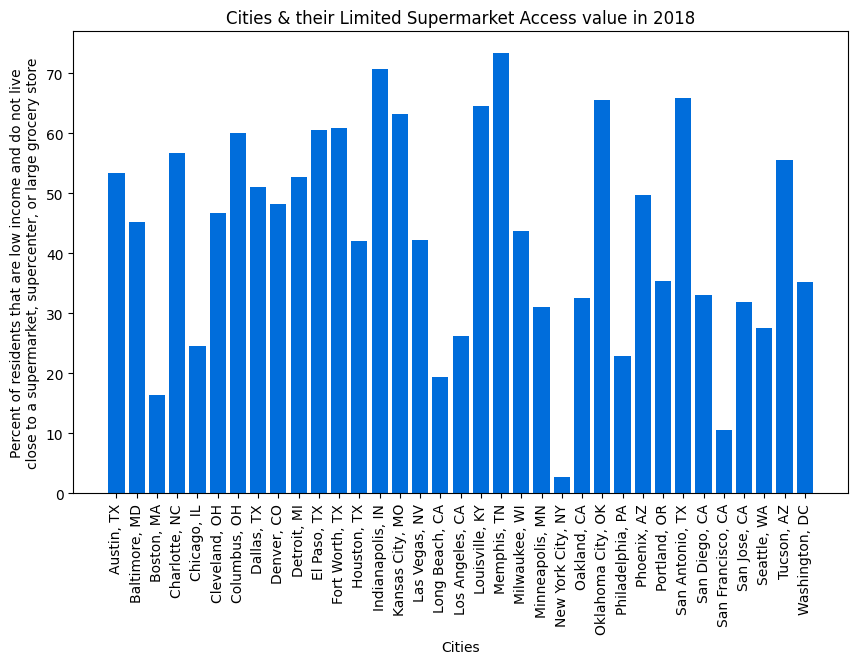

In [195]:
# Histogram for the value of "Limited Supermarket Access" for each city
city_names = features.index.tolist()
limited_access_values = features['Limited Supermarket Access']
metric_label = data.loc[data["metric_item_label"] == "Limited Supermarket Access", "metric_item_label_subtitle"].iloc[0]
metric_label = "\n".join(textwrap.wrap(metric_label, 60))

# Increase the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

# Create histogram
plt.bar(city_names, limited_access_values)
plt.xlabel('Cities')
plt.ylabel(metric_label)
plt.title('Cities & their Limited Supermarket Access value in 2018')
plt.xticks(rotation=90)

plt.savefig("../output/hist_supermarket.png", bbox_inches='tight', dpi=300)
plt.show()

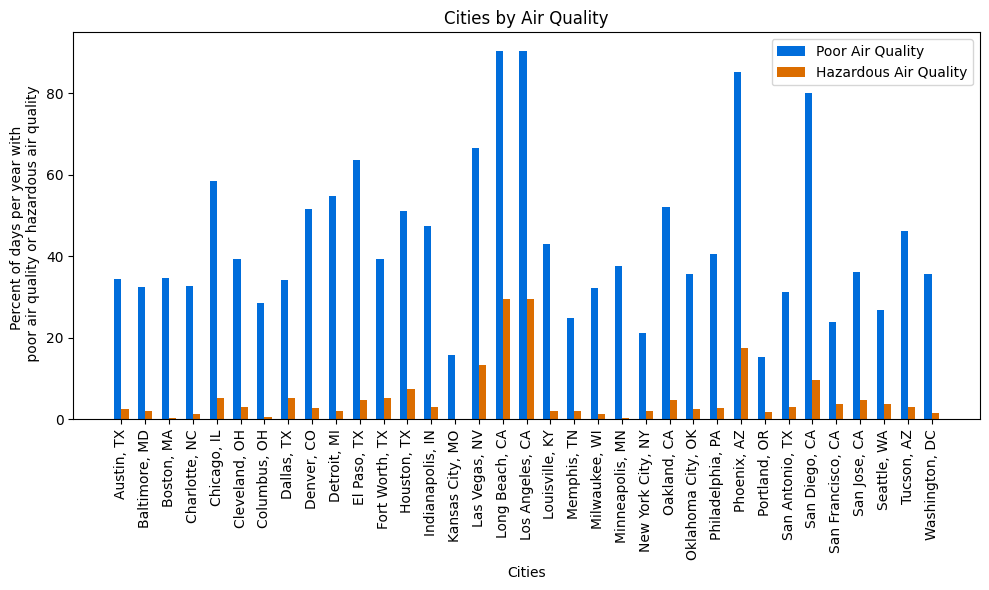

In [196]:
#Plot the Air Quality for the cities

# Get the city names and the features for air quality
poor_air_quality_values = features['Poor Air Quality']
hazardous_air_quality_values = features['Hazardous Air Quality']

# Define the metric lable
metric_label = 'Percent of days per year with \n poor air quality or hazardous air quality'

# Increase the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

# Create grouped bar chart
bar_width = 0.3  # Width of each bar
opacity = 1  # Opacity of the bars

# Set positions of the bars on the x-axis
bar_positions = range(len(city_names))

# Plot the bars for poor air quality
plt.bar(bar_positions, poor_air_quality_values, bar_width,
        alpha=opacity, label='Poor Air Quality')

# Plot the bars for hazardous air quality
plt.bar([pos + bar_width for pos in bar_positions], hazardous_air_quality_values, bar_width,
        alpha=opacity, label='Hazardous Air Quality')

# Add labels and title
plt.xlabel('Cities')
plt.ylabel(metric_label)
plt.title('Cities by Air Quality')
plt.xticks([pos + bar_width/2 for pos in bar_positions], city_names, rotation=90)
plt.legend()
plt.tight_layout()

# Save and Show the plot
plt.savefig("../output/hist_air.png", bbox_inches='tight', dpi=300)
plt.show()

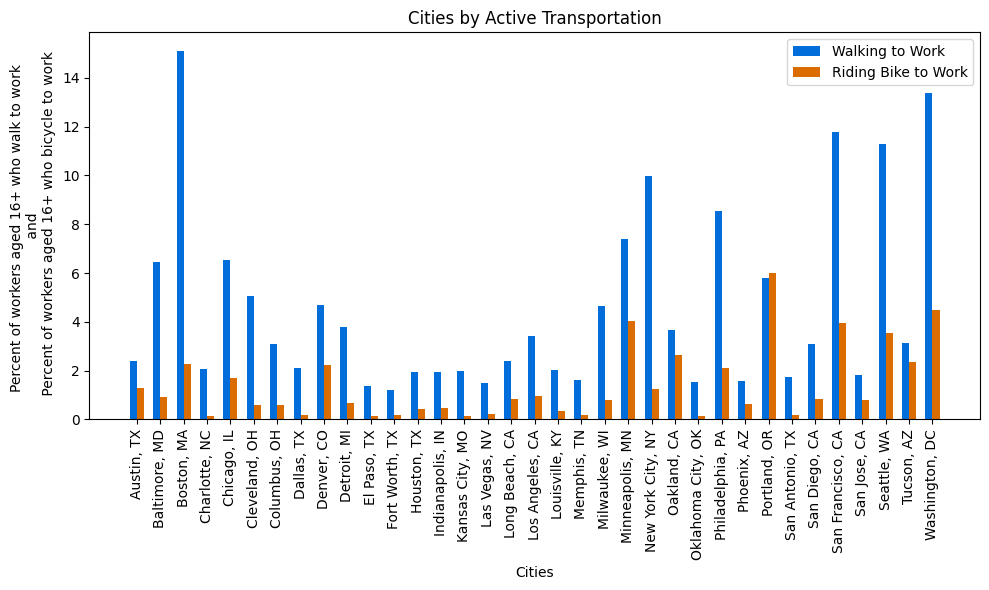

In [198]:
# Plot the Active Transportation metrics for the cities

# Get the features for active transportation
walk_towork_values = features['Walking to Work']
ride_towork_values = features['Riding Bike to Work']

# Define the metric lable
metric_label = 'Percent of workers aged 16+ who walk to work \n and \n Percent of workers aged 16+ who bicycle to work'

# Increase the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

# Create grouped bar chart
bar_width = 0.3  # Width of each bar
opacity = 1  # Opacity of the bars

# Set positions of the bars on the x-axis
bar_positions = range(len(city_names))

# Plot the bars for walking to work
plt.bar(bar_positions, walk_towork_values, bar_width,
        alpha=opacity, label='Walking to Work')

# Plot the bars for riding bike to work
plt.bar([pos + bar_width for pos in bar_positions], ride_towork_values, bar_width,
        alpha=opacity, label='Riding Bike to Work')

# Add labels and title
plt.xlabel('Cities')
plt.ylabel(metric_label)
plt.title('Cities by Active Transportation')
plt.xticks([pos + bar_width/2 for pos in bar_positions], city_names, rotation=90)
plt.legend()
plt.tight_layout()

# Save and Show the plot
plt.savefig("../output/hist_active_transport.png", bbox_inches='tight', dpi=300)
plt.show()

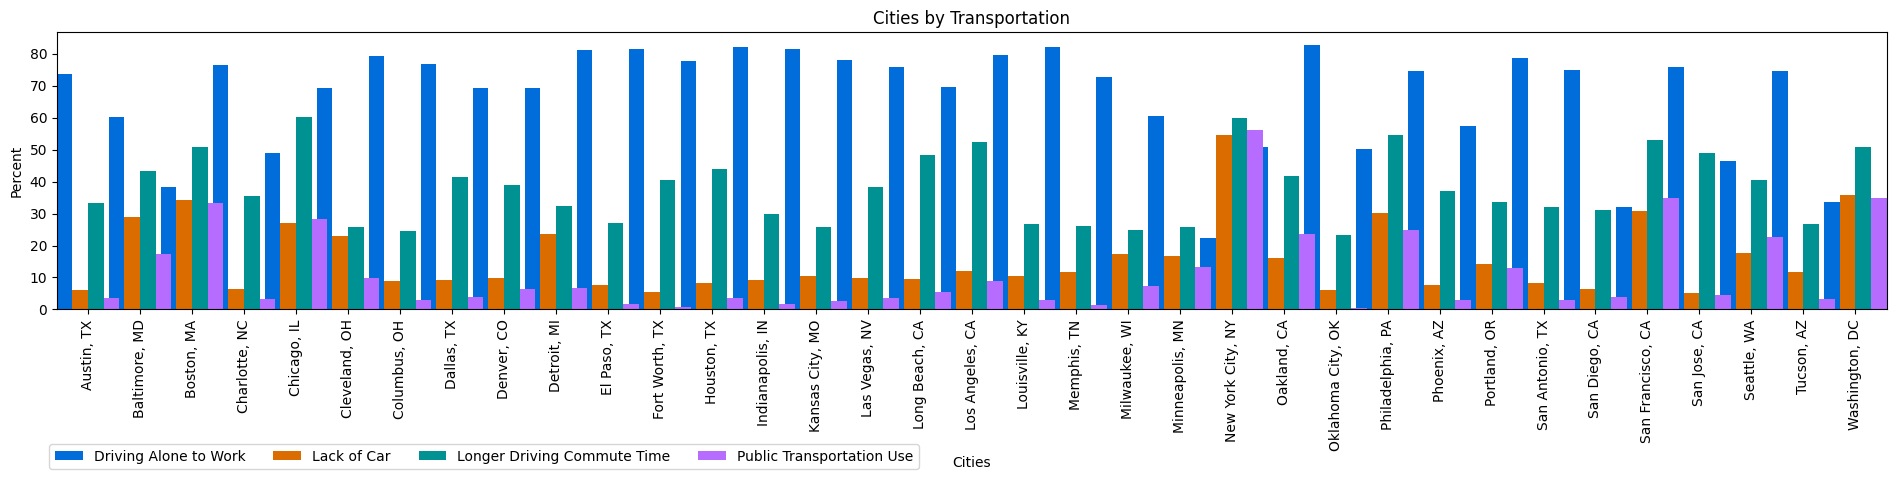

In [228]:
# Plot the Transportation metrics for the cities
drives_alone_values = features['Drives Alone to Work']
lack_ofcar_values = features['Lack of Car']
driving_commute_time_values = features["Longer Driving Commute Time"]
public_transportation_values = features["Public Transportation Use"]

# Increase the figure size
plt.figure(figsize=(20, 6))  # Adjust the width and height as desired

# Create grouped bar chart
bar_width = 0.3  # Width of each bar
opacity = 1  # Opacity of the bars

# Set positions of the bars on the x-axis
bar_positions = np.arange(len(city_names))

# Plot the bars for Driving Alone to Work
plt.bar(bar_positions - 1.5*bar_width, drives_alone_values, bar_width,
        alpha=opacity, label='Driving Alone to Work')

# Plot the bars for Lack of Car
plt.bar(bar_positions - 0.5*bar_width, lack_ofcar_values, bar_width,
        alpha=opacity, label='Lack of Car')

# Plot the bars for longer driving commute time
plt.bar(bar_positions + 0.5*bar_width, driving_commute_time_values, bar_width,
        alpha=opacity, label='Longer Driving Commute Time')

# Plot the bars for public transportation use
plt.bar(bar_positions + 1.5*bar_width, public_transportation_values, bar_width,
        alpha=opacity, label='Public Transportation Use')

# Add labels and title
plt.xlabel('Cities')
plt.ylabel('Percent')
plt.title('Cities by Transportation')
plt.xticks(bar_positions, city_names, rotation=90)
plt.legend(loc='lower right', bbox_to_anchor=(0.475, -0.6),
          fancybox=True, ncol=5)


# Adjust the spacing between cities
plt.xlim(bar_positions[0] - 2*bar_width, bar_positions[-1] + 2*bar_width)

# Show the plot
plt.tight_layout()
plt.savefig("../output/hist_transportation.png", bbox_inches='tight', dpi=300)
plt.show()

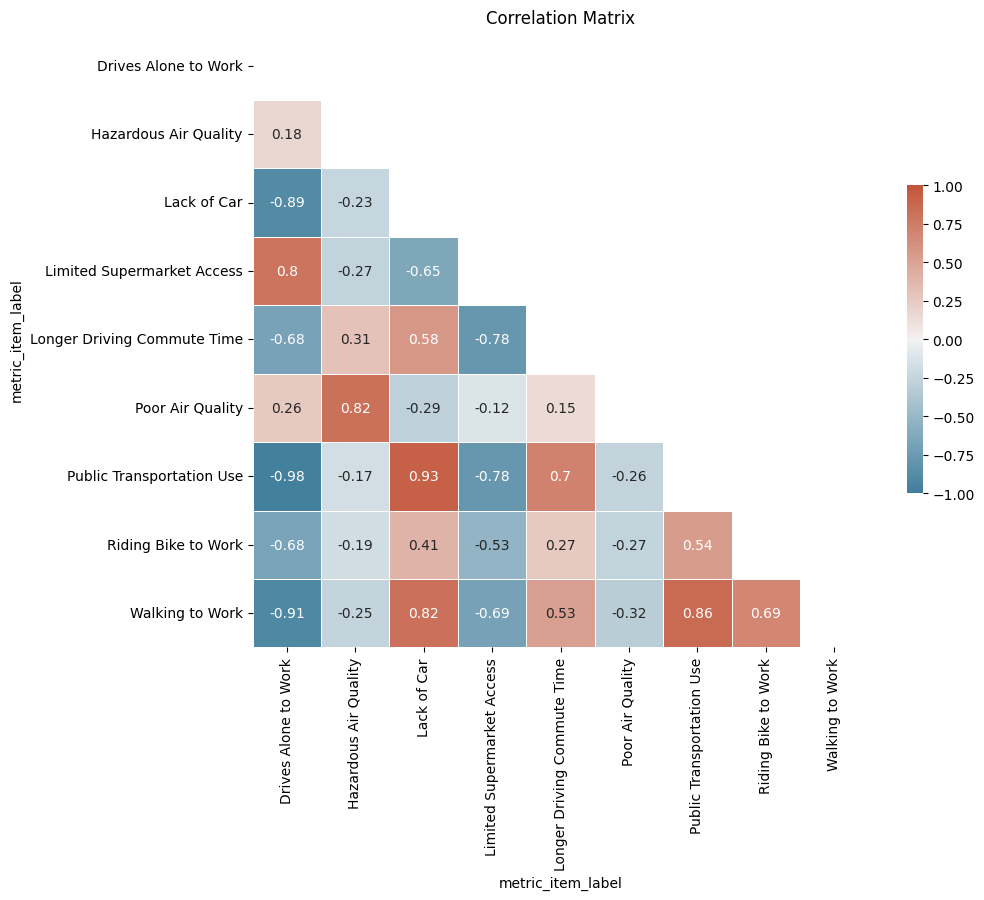

In [229]:
# Analize the feature correlation
# In theory: To make sure that the features are independent, features that are highly correlated need to be deleted.
# The reality of this project: if we delete all the correlating features, we are left with nearly none...

# Compute the correlation matrix
corr_matrix = features.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=0.5, annot=True, cbar_kws={'shrink': 0.5})
plt.title('Correlation Matrix')
plt.savefig("../output/corr_matric.png", bbox_inches='tight', dpi=300)
plt.show()


## 3- Machine Learing Models

In [28]:
# Drop the city lables and index it with numbers to make Leave-one-out crossvalidation possible:
outcome = outcome.reset_index(drop=True)

In [29]:
outcome

metric_item_label,Diabetes
0,7.5
1,13.7
2,8.0
3,9.2
4,10.9
5,17.3
6,11.0
7,11.3
8,7.0
9,18.5


### 3.1- Linear Regression

In [112]:
# Initialize the leave-one-out cross-validator
loo = LeaveOneOut()

# Initialize lists to store the predicted outcomes, coefficients and intercepts
predicted_outcomes_linear = []
coefs_linear = []
intercepts_linear = []

# Perform leave-one-out cross-validation
for train_index, test_index in loo.split(features):
    
    # Split the data into training and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = outcome.iloc[train_index], outcome.iloc[test_index]

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Predict the outcome for the test set
    y_pred_linear = model.predict(X_test_scaled)
    predicted_outcomes_linear.append(y_pred_linear[0])

    # Save the coefficients and intercept for each model
    coefs_linear.append(model.coef_.tolist()[0])
    intercepts_linear.append(model.intercept_)

# Compute the mean squared error (MSE) & root mean squared error (RMSE) of the predicted outcomes
mse_linear = mean_squared_error(outcome, predicted_outcomes_linear)
rmse_linear = np.sqrt(mse_linear)

# Compute the R-squared of the linear regression model
r2_linear = model.score(scaler.transform(features), outcome)

# Compute the Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(outcome, predicted_outcomes_linear)

# Compute the standard deviation of the coefficients
coef_linear_std = np.std(coefs_linear, axis=0)

# Print the performance metrics
print("Mean Squared Error:", mse_linear)
print("Root Mean Squared Error:", rmse_linear)
print("R-squared:", r2_linear)
print("Mean Absolute Error:", mae_linear)

# Print the average coefficients and intercept of the linear regression model
coef_linear_avg = np.mean(coefs_linear, axis=0)
intercept_linear_avg = np.mean(intercepts_linear)
features_names = list(features.columns)

for i, feature_name in enumerate(features_names):
    print("Coefficient for", feature_name, ":", coef_linear_avg[i], '+/-', coef_linear_std[i])
print("Intercept:", intercept_linear_avg)

Mean Squared Error: 6.501224144798731
Root Mean Squared Error: 2.549749820040925
R-squared: 0.6728814588566479
Mean Absolute Error: 1.9396855467609864
Coefficient for Drives Alone to Work : -2.720960271834122 +/- 0.8812073939419365
Coefficient for Hazardous Air Quality : 0.18085035818408612 +/- 0.1223266691794041
Coefficient for Lack of Car : 4.875008302374869 +/- 0.30252023842489867
Coefficient for Limited Supermarket Access : 0.5220209738320718 +/- 0.13495844217297942
Coefficient for Longer Driving Commute Time : 0.09756470300200364 +/- 0.14846722551266964
Coefficient for Poor Air Quality : -0.16127844721014747 +/- 0.13099703047572353
Coefficient for Public Transportation Use : -5.380975964585204 +/- 0.9313763999926525
Coefficient for Riding Bike to Work : -0.889552908617824 +/- 0.14644862426643843
Coefficient for Walking to Work : -1.8556829334976852 +/- 0.2812263569462005
Intercept: 11.051428571428572


### 3.2- Ridge Regression

In [113]:
# Initialize the leave-one-out cross-validator
loo = LeaveOneOut()

# Initialize lists to store the predicted outcomes, coefficients, and intercepts
predicted_outcomes_ridge = []
coefs_ridge = []
intercepts_ridge = []

# Define the range of alpha values to search
alphas = [0.1, 1, 10, 100]

# Perform leave-one-out cross-validation
for train_index, test_index in loo.split(features):
    
    # Split the data into training and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = outcome.iloc[train_index], outcome.iloc[test_index]

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform hyperparameter tuning using LOOCV
    param_grid = {'alpha': alphas}
    grid_search = GridSearchCV(Ridge(), param_grid, cv=LeaveOneOut())
    grid_search.fit(X_train_scaled, y_train)
    
    # Get the best hyperparameters
    best_alpha_ridge = grid_search.best_params_['alpha']

    # Fit the Ridge regression model with the best alpha of the according model
    model = Ridge(alpha=best_alpha_ridge, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict the outcome for the test set
    y_pred_ridge = model.predict(X_test_scaled)
    predicted_outcomes_ridge.append(y_pred_ridge[0])
    
    # Save the coefficients and intercept for each model
    coefs_ridge.append(model.coef_.tolist()[0])
    intercepts_ridge.append(model.intercept_)

# Compute the mean squared error (MSE) & root mean squared error (RMSE) of the predicted outcomes
mse_ridge = mean_squared_error(outcome, predicted_outcomes_ridge)
rmse_ridge = np.sqrt(mse_ridge)

# Compute the R-squared of the Ridge regression model
r2_ridge = model.score(scaler.transform(features), outcome)

# Compute the Mean Absolute Error (MAE)
mae_ridge = mean_absolute_error(outcome, predicted_outcomes_ridge)

# Compute the standard deviation of the coefficients
coef_ridge_std = np.std(coefs_ridge, axis=0)

# Print the performance metrics
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("R-squared:", r2_ridge)
print("Mean Absolute Error:", mae_ridge)

# Print the average coefficients and intercept of the Ridge regression model
coef_ridge_avg = np.mean(coefs_ridge, axis=0)
intercept_ridge_avg = np.mean(intercepts_ridge)
features_names = list(features.columns)

for i, feature_name in enumerate(features_names):
    print("Coefficient for", feature_name, ":", coef_ridge_avg[i], '+/-', coef_ridge_std[i])
print("Intercept:", intercept_ridge_avg)

Mean Squared Error: 6.358493283536561
Root Mean Squared Error: 2.521605298919036
R-squared: 0.668674708849149
Mean Absolute Error: 1.9228285722806298
Coefficient for Drives Alone to Work : -1.1081774230719592 +/- 0.5453447127201018
Coefficient for Hazardous Air Quality : 0.1436720567821082 +/- 0.11856202887522692
Coefficient for Lack of Car : 4.560204572832939 +/- 0.27883075405856933
Coefficient for Limited Supermarket Access : 0.5637257043881269 +/- 0.13368828416673295
Coefficient for Longer Driving Commute Time : 0.09523028494412297 +/- 0.1419007574197477
Coefficient for Poor Air Quality : -0.07397989821038248 +/- 0.13004359158938755
Coefficient for Public Transportation Use : -3.807850569353625 +/- 0.655980377964828
Coefficient for Riding Bike to Work : -0.6723311350093141 +/- 0.11405870136726408
Coefficient for Walking to Work : -1.5763322464553466 +/- 0.27317442698916544
Intercept: 11.051428571428572


### 3.3- Lasso Regression

In [31]:
# Initialize the leave-one-out cross-validator
loo = LeaveOneOut()

# Initialize lists to store the predicted outcomes, coefficients, and intercepts
predicted_outcomes_lasso = []
coefs_lasso = []
intercepts_lasso = []

# Define the range of alpha values to search
alphas = [0.1, 1, 10, 100]

# Perform leave-one-out cross-validation
for train_index, test_index in loo.split(features):
    
    # Split the data into training and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = outcome.iloc[train_index], outcome.iloc[test_index]

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform hyperparameter tuning using LOOCV
    param_grid = {'alpha': alphas}
    grid_search = GridSearchCV(Lasso(), param_grid, cv=LeaveOneOut())
    grid_search.fit(X_train_scaled, y_train)
    
    # Get the best hyperparameters
    best_alpha_lasso = grid_search.best_params_['alpha']

    # Fit the Lasso regression model with the best alpha  of the according model
    model = Lasso(alpha=best_alpha_lasso, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict the outcome for the test set
    y_pred_lasso = model.predict(X_test_scaled)
    predicted_outcomes_lasso.append(y_pred_lasso[0])
    
    # Save the coefficients and intercept for each model
    coefs_lasso.append(model.coef_.tolist())
    intercepts_lasso.append(model.intercept_)

# Compute the mean squared error (MSE) & root mean squared error (RMSE) of the predicted outcomes
mse_lasso = mean_squared_error(outcome, predicted_outcomes_lasso)
rmse_lasso = np.sqrt(mse_lasso)

# Compute the R-squared of the Lasso regression model
r2_lasso = model.score(scaler.transform(features), outcome)

# Compute the Mean Absolute Error (MAE)
mae_lasso = mean_absolute_error(outcome, predicted_outcomes_lasso)

# Compute the standard deviation of the coefficients
coef_lasso_std = np.std(coefs_lasso, axis=0)

# Print the performance metrics
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("R-squared:", r2_lasso)
print("Mean Absolute Error:", mae_lasso)

# Print the average coefficients and intercept of the Lasso regression model
coef_lasso_avg = np.mean(coefs_lasso, axis=0)
intercept_lasso_avg = np.mean(intercepts_lasso)
features_names = list(features.columns)

for i, feature_name in enumerate(features_names):
    print("Coefficient for", feature_name, ":", coef_lasso_avg[i], '+/-', coef_lasso_std[i])
print("Intercept:", intercept_lasso_avg)


Mean Squared Error: 5.563714681859881
Root Mean Squared Error: 2.3587527809967455
R-squared: 0.6222460619392396
Mean Absolute Error: 1.7924412355344614
Coefficient for Drives Alone to Work : 0.02645647649417312 +/- 0.12075573705526339
Coefficient for Hazardous Air Quality : 6.30815847748231e-05 +/- 0.00036782568627259925
Coefficient for Lack of Car : 2.880492304786596 +/- 0.2551224634108315
Coefficient for Limited Supermarket Access : 0.5684934169259277 +/- 0.0898912003705451
Coefficient for Longer Driving Commute Time : -0.01946088331599489 +/- 0.06218329449023047
Coefficient for Poor Air Quality : 0.007287412254730684 +/- 0.028288234155791472
Coefficient for Public Transportation Use : -1.3762748626011148 +/- 0.40062614682504444
Coefficient for Riding Bike to Work : -0.7890980084956228 +/- 0.0739636080602583
Coefficient for Walking to Work : -1.0304469349961178 +/- 0.23219785502905543
Intercept: 11.051428571428572


### 3.4- Random Forest Regression

In [57]:
# ATTENTION: This Cell takes about 8h to run, due to the expensive hyperparameter tuning.
# If you don't want to run it, you can initialize the results of it via the next cell

# Initialize the leave-one-out cross-validator
loo = LeaveOneOut()

# Initialize lists to store the predicted outcomes and the feature importances
predicted_outcomes_rf = []
feature_importances = []

# Perform leave-one-out cross-validation
for train_index, test_index in loo.split(features):
    
    # Split the data into training and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = outcome.iloc[train_index], outcome.iloc[test_index]

    # Scaling with StandardScaler is not necessary for Random Forest regression. 
    # Random Forest models are based on decision trees, which are not sensitive to the scale of the features.
    
    # Set the hyperparameters for hyperparameter tuning
    param_grid = {
        'n_estimators': [50, 100, 150],  # Specify the range of values for the number of estimators
        'max_depth': [None, 5, 10],  # Specify the range of values for the maximum depth
        'min_samples_split': [2, 5, 10],  # Specify the range of values for the minimum samples split
        'min_samples_leaf': [1, 2, 4]  # Specify the range of values for the minimum samples leaf
    }
    
    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=LeaveOneOut())
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters
    best_n_estimators = grid_search.best_params_['n_estimators']
    best_max_depth = grid_search.best_params_['max_depth']
    best_min_samples_split = grid_search.best_params_['min_samples_split']
    best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
    
    # Fit the Random Forest regression model with the best hyperparameters
    model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                  min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf,
                                  random_state=42)
    model.fit(X_train, y_train)

    # Predict the outcome for the test set
    y_pred_rf = model.predict(X_test)
    predicted_outcomes_rf.append(y_pred_rf[0])
    
    # Save the feature importances
    feature_importances.append(model.feature_importances_)

# Compute the mean squared error (MSE) & root mean squared error (RMSE) of the predicted outcomes
mse_rf = mean_squared_error(outcome, predicted_outcomes_rf)
rmse_rf = np.sqrt(mse_rf)

# Compute the R-squared of the Random Forest regression model
r2_rf = model.score(features, outcome)

# Compute the Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(outcome, predicted_outcomes_rf)

# Print the mean squared error
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)
print("Mean Absolute Error:", mae_rf)

# Average feature importances across all iterations
average_feature_importances = np.mean(feature_importances, axis=0)

# Compute the standard deviations of the feature importances
feature_importances_std = np.std(feature_importances, axis=0)

# Print the feature importances with standard deviations
features_names = list(features.columns)

for i, feature_name in enumerate(features_names):
    print("Feature Importance for", feature_name, ":", average_feature_importances[i], "+/-", feature_importances_std[i])


Mean Squared Error: 5.530564114285709
Root Mean Squared Error: 2.351715143099969
R-squared: 0.9003495741627523
Mean Absolute Error: 1.8811428571428561
Feature Importance for Drives Alone to Work : 0.09384247652754293 +/- 0.016695049478208004
Feature Importance for Hazardous Air Quality : 0.030827805792955028 +/- 0.006672736603777908
Feature Importance for Lack of Car : 0.17238088472498814 +/- 0.02033006343969027
Feature Importance for Limited Supermarket Access : 0.06689084379992145 +/- 0.016385224157077917
Feature Importance for Longer Driving Commute Time : 0.11965370173719315 +/- 0.02645609080362662
Feature Importance for Poor Air Quality : 0.0471718846088505 +/- 0.010834985480035524
Feature Importance for Public Transportation Use : 0.024701216934982433 +/- 0.004852067952937358
Feature Importance for Riding Bike to Work : 0.38453424633518557 +/- 0.03888729490573375
Feature Importance for Walking to Work : 0.0599969395383809 +/- 0.013382356182401856


In [5]:
#if you want to initialize the results from the RF without running it, just remove the comment marks from this cell
mse_rf = 5.530564114285709
rmse_rf = 2.351715143099969
r2_rf = 0.9003495741627523
mae_rf = 1.8811428571428561

average_feature_importances = [0.09384248, 0.03082781, 0.17238088, 0.06689084, 0.1196537, 0.04717188, 0.02470122, 0.38453425, 0.05999694]
feature_importances_std = [0.01669505, 0.00667274, 0.02033006, 0.01638522, 0.02645609, 0.01083499, 0.00485207, 0.03888729, 0.01338236]

predicted_outcomes_rf = [
10.159999999999997, 10.552000000000003, 9.836, 12.181999999999995, 12.057999999999993, 14.060000000000008, 12.15,
11.201999999999998, 10.814000000000004, 12.026, 12.142000000000001, 12.717999999999996, 11.042000000000003, 13.219999999999995, 
12.818000000000005, 12.427999999999999, 10.294, 10.8, 12.932000000000006, 11.936000000000003, 11.338, 10.172000000000004, 
10.899999999999995, 8.256, 13.195999999999996, 8.704000000000002, 12.187999999999995, 8.608, 12.008000000000003, 10.844000000000001, 
9.989999999999998, 10.405999999999999, 9.228000000000002, 9.862, 8.614000000000003
]



## 4- Evaluation & comparison of  the ML models’ performance (visualisation of results)
### 4.1- Visualisation of results

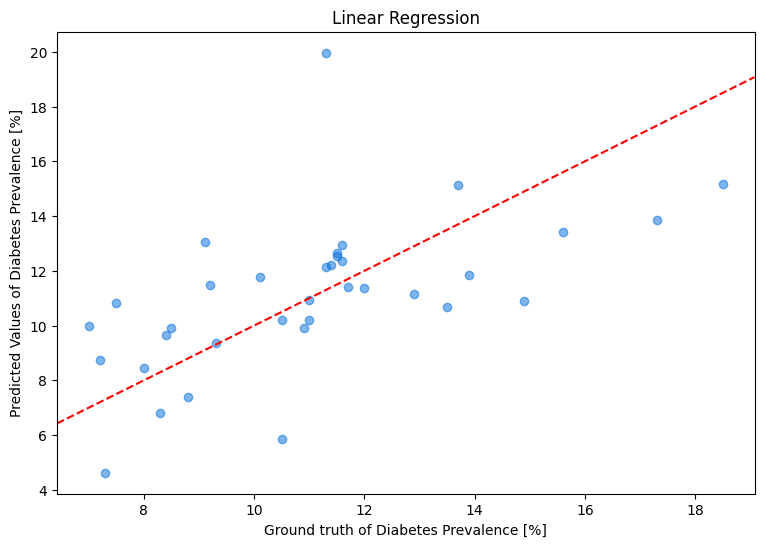

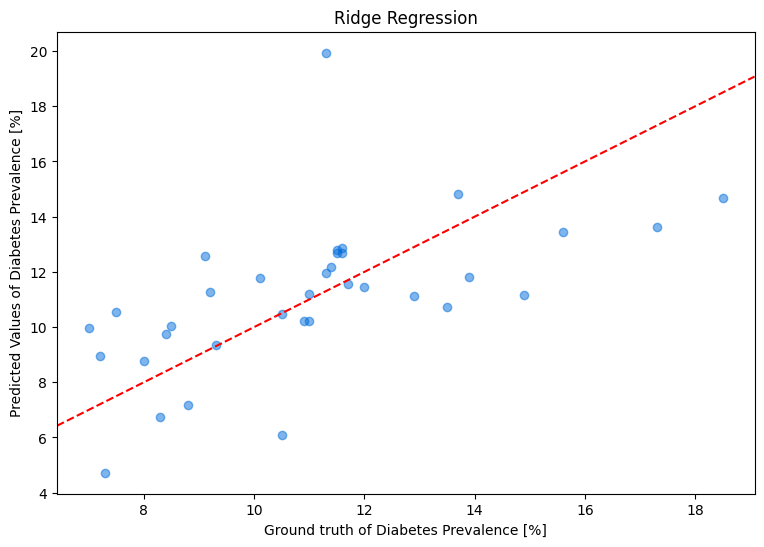

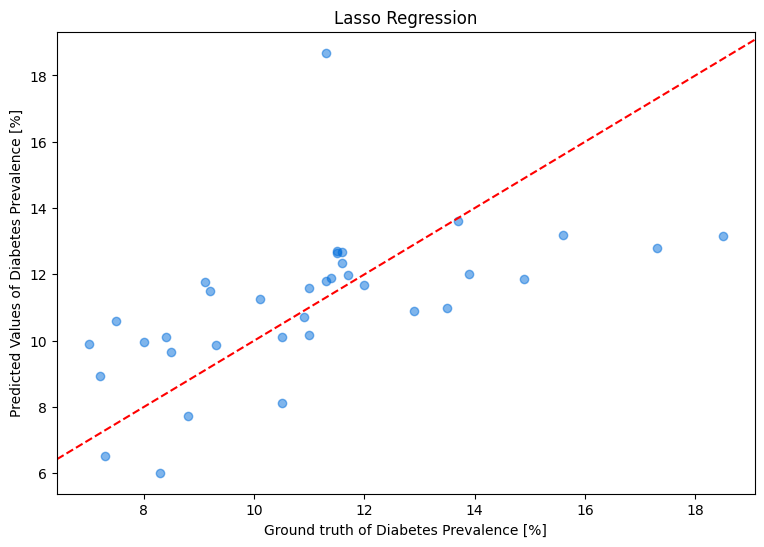

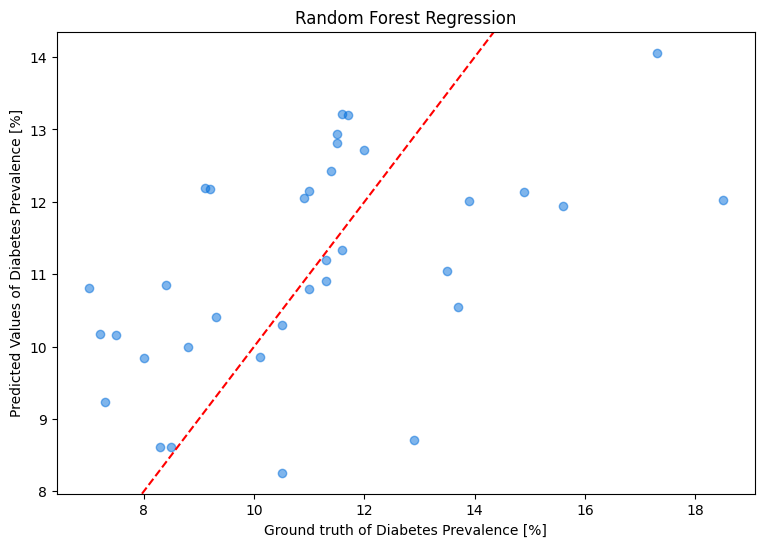

In [230]:
# Utility function to plot the diagonal line for visualizing the optimal fit of the model
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

# Function to visualize the scatter plot with optimal fit line
def plot_scatter_with_optimal_fit(y_true, y_pred, model_name):
    # Create a scatter plot (prediction vs ground truth)
    fig, ax = plt.subplots(figsize=(9, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)

    # Set axis labels and title
    plt.xlabel('Ground truth of Diabetes Prevalence [%]')
    plt.ylabel('Predicted Values of Diabetes Prevalence [%]')
    plt.title(model_name)
    
    # Add diagonal line with the add_identity utility function
    add_identity(ax, color='red', ls='--')

    # Add optimal fit label
    # plt.text(np.min(y_true), np.max(y_true), 'Optimal Fit', fontdict=None, color='red', rotation=36)

    # Show the plot
    plt.savefig(f"../output/scatter_{model_name}.png", bbox_inches='tight', dpi=300)
    plt.show()

# Visualize results for Linear Regression
plot_scatter_with_optimal_fit(outcome, predicted_outcomes_linear, 'Linear Regression')

# Visualize results for Ridge Regression
plot_scatter_with_optimal_fit(outcome, predicted_outcomes_ridge, 'Ridge Regression')

# Visualize results for Lasso Regression
plot_scatter_with_optimal_fit(outcome, predicted_outcomes_lasso, 'Lasso Regression')

# Visualize results for Random Forest Regression
plot_scatter_with_optimal_fit(outcome, predicted_outcomes_rf, 'Random Forest Regression')


### 4.2- Comparison of performance

In [33]:
# Initialize the models and the scores
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest Regression']
mse_scores = [mse_linear, mse_ridge, mse_lasso, mse_rf]
rmse_scores = [rmse_linear, rmse_ridge, rmse_lasso, rmse_rf]
r2_scores = [r2_linear, r2_ridge, r2_lasso, r2_rf]
mae_scores = [mae_linear, mae_ridge, mae_lasso, mae_rf]

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 14))

# Plot MSE scores
axs[0, 0].bar(model_names, mse_scores)
axs[0, 0].set_ylabel('Mean Squared Error (MSE)')
axs[0, 0].set_title('Comparison of Model Performances via MSE')

# Plot RMSE scores
axs[0, 1].bar(model_names, rmse_scores)
axs[0, 1].set_ylabel('Root Mean Squared Error (RMSE)')
axs[0, 1].set_title('Comparison of Model Performances via RMSE')

# Plot R2 scores
axs[1, 0].bar(model_names, r2_scores)
axs[1, 0].set_ylabel('R-squared (R)')
axs[1, 0].set_title('Comparison of Model Performances via R-squared')

# Plot MAE scores
axs[1, 1].bar(model_names, mae_scores)
axs[1, 1].set_ylabel('Mean Absolute Error (MAE)')
axs[1, 1].set_title('Comparison of Model Performances via MAE')

# Rotate x-axis labels
for ax in axs.flat:
    ax.set_xticklabels(model_names, rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.savefig("../output/hist_performance.png", bbox_inches='tight', dpi=300)
plt.show()


NameError: name 'mse_linear' is not defined

In [138]:
# Find the best performing Model
# Calculate ranks for each performance metric
mse_ranks = [sorted(range(len(mse_scores)), key=lambda x: mse_scores[x]).index(i) + 1 for i in range(len(mse_scores))]
rmse_ranks = [sorted(range(len(rmse_scores)), key=lambda x: rmse_scores[x]).index(i) + 1 for i in range(len(rmse_scores))]
r2_ranks = [sorted(range(len(r2_scores)), key=lambda x: r2_scores[x], reverse=True).index(i) + 1 for i in range(len(r2_scores))]
mae_ranks = [sorted(range(len(mae_scores)), key=lambda x: mae_scores[x]).index(i) + 1 for i in range(len(mae_scores))]

# Calculate total ranks for each model
total_ranks = [mse_ranks[i] + rmse_ranks[i] + r2_ranks[i] + mae_ranks[i] for i in range(len(model_names))]

# Create a dictionary to store model rankings
model_rankings = {}
for i, model in enumerate(model_names):
    model_rankings[model] = total_ranks[i]

# Sort the models based on their total ranks
sorted_rankings = sorted(model_rankings.items(), key=lambda x: x[1])

# Print the rankings of all models
print("Model Rankings:")
for rank, (model, total_rank) in enumerate(sorted_rankings, start=1):
    print(f"Rank {rank}: {model} (Total Rank: {total_rank})")

# The best performing model is the Random Forest Regression
# The second best performing model is the Lasso Regression
# Those best two models will be visualized below

Model Rankings:
Rank 1: Random Forest Regression (Total Rank: 5)
Rank 2: Lasso Regression (Total Rank: 9)
Rank 3: Ridge Regression (Total Rank: 12)
Rank 4: Linear Regression (Total Rank: 14)


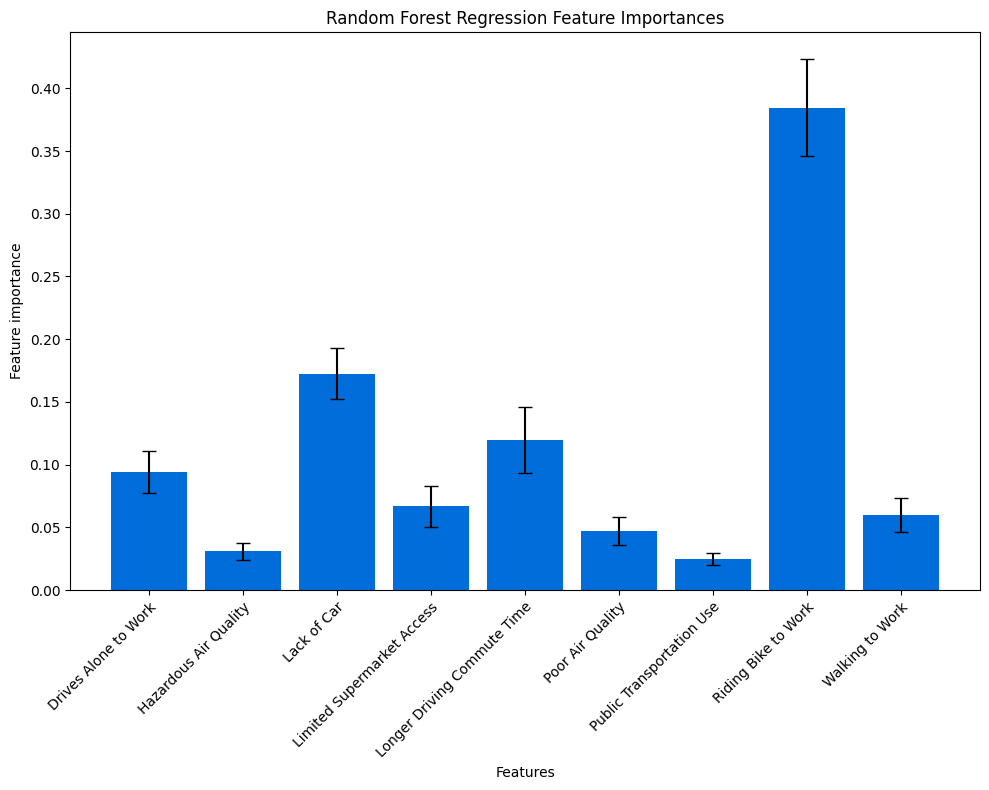

In [232]:
# Best Model: Plot the feature importances of the random forest regression
# Get the feature names
feature_names = features.columns

# Plot the feature importances with error bars
plt.figure(figsize=(10, 8))
plt.bar(range(len(feature_names)), average_feature_importances, yerr=feature_importances_std, capsize=5)
plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('Features')
plt.ylabel('Feature importance')
plt.title(f'{model_names[3]} Feature Importances')
plt.tight_layout()

plt.savefig("../output/rf_feat_importance.png", bbox_inches='tight', dpi=300)
plt.show()


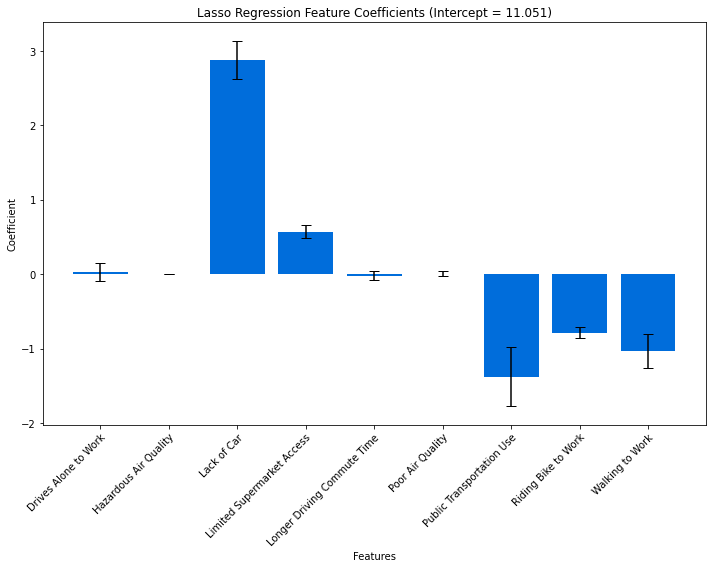

In [37]:
# Second Best Model: Plot the feature coefficients of the Lasso Regression

# Get the feature names
feature_names = features.columns

# Plot the feature coefficients with error bars
plt.figure(figsize=(10, 8))
plt.bar(range(len(feature_names)), coef_lasso_avg, yerr=coef_lasso_std, capsize=5)
plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title(f'{model_names[2]} Feature Coefficients (Intercept = {round(intercept_lasso_avg,3)})')
plt.tight_layout()

plt.savefig("../output/lasso_feat_coeff.png", bbox_inches='tight', dpi=300)
plt.show()
